In [274]:
import numpy as np
import pandas as pd

In [275]:
deck = sorted(
    [ str( i) for i in range( 2, 10)] * 4 + ['10'] * (4*4) + ['A'] * 4
    )
print( deck)

['10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '2', '2', '2', '2', '3', '3', '3', '3', '4', '4', '4', '4', '5', '5', '5', '5', '6', '6', '6', '6', '7', '7', '7', '7', '8', '8', '8', '8', '9', '9', '9', '9', 'A', 'A', 'A', 'A']


In [276]:
current_deck = (deck * 2).copy()

In [277]:
basic_strategy_hard = pd.read_csv('data\\basic-strategy-hard.csv', index_col = 'Index')
# basic_strategy_hard.head()

In [278]:
basic_strategy_soft = pd.read_csv('data\\basic-strategy-soft.csv', index_col = 'Index')
# basic_strategy_soft.head()

In [279]:
# print( basic_strategy_hard.columns)
# print( basic_strategy_hard.index)

In [280]:
basic_strategy_hard.index = list( map( str, basic_strategy_hard.index))
# print( basic_strategy_hard.columns)
# print( basic_strategy_hard.index)

In [281]:
# print( basic_strategy_soft.columns)
# print( basic_strategy_soft.index)

In [282]:
basic_strategy_soft.index = list( map( str, basic_strategy_soft.index))
# print( basic_strategy_soft.columns)
# print( basic_strategy_soft.index)

In [283]:
def value_sum( cards):

    values = np.array( [], dtype = int)
    num_A = np.count_nonzero( cards == 'A')
    values = np.append( values, sum( list( map( value, cards))))
    for i in range( 1, num_A+1):
        values = np.append( values, sum( list( map( value, cards)))-10*i)
    return values

In [284]:
def draw_cards():
    cards = np.random.choice( current_deck)
    current_deck.remove( card)
    return card

def value( card):
    try:
        return int( card)
    except:
        return 11

def check( value):
    if value == 11:
        return 'A'
    else:
        return str( value)

In [285]:
class Dealer():
    def __init__( self, verbose = True):
        self.cards = np.array( [])
        self.value = 0
        self.verbose = verbose
    
    def draw( self):
        card = draw_card()
        self.cards = np.append( self.cards, card)
        self.possible_values = value_sum( self.cards)
        if min( self.possible_values) <= 21:
            self.value = max( self.possible_values[ self.possible_values <= 21])
        else:
            self.value = min( self.possible_values)
        if self.verbose == True:
            print( f'Dealer\'s cards are {self.cards}')

In [286]:
class Player():
    def __init__( self, verbose = True):
        self.cards = np.array( [])
        self.value = 0
        self.verbose = verbose
    
    def draw( self):
        card = draw_card()
        self.cards = np.append( self.cards, card)
        self.possible_values = value_sum( self.cards)
        if min( self.possible_values) <= 21:
            self.value = max( self.possible_values[ self.possible_values <= 21])
        else:
            self.value = min( self.possible_values)
        if verbose == True:
            print( f'Player\'s cards are {self.cards}')

In [287]:
def basic_strategy_action( player, dealer, total):
    if total == 'hard':
        return basic_strategy_hard.loc[ str( player.value), check( dealer.value)]
    elif total == 'soft':
        return basic_strategy_soft.loc[ str( player.value), check( dealer.value)]

In [311]:
def game( player_upcard = None, dealer_upcard = None):
    global current_deck
    surrender = False
    betsize = 1
    change = 0
    dealer = Dealer( verbose = False)
    player = Player( verbose = False)
    
    if dealer_upcard == None:
        dealer.draw()
    
    if player_upcard == None:
        player.draw()
    else:
        np.append( player.cards, player_upcard) # In case of splitting
    player.draw()

    action = 'H'

    while (player.value < 21) and (action != 'S'):
        if 'A' in player.cards:
            total = 'soft'
        else:
            total = 'hard'

        action = basic_strategy_action( player, dealer, total)

        if action == 'Sur':
            if len( player.cards) == 2:
                surrender = True
                break
            else:
                action = 'H'

        if action == 'H':
            player.draw()

        if action == 'D':
            player.draw()
            betsize *= 2
            action = 'S'

    if surrender == True:
        change = -betsize / 2
        return change

    while dealer.value < 17:
        dealer.draw()
    
    if ( (player.value < 22) & (player.value > dealer.value) ) | (dealer.value >= 22):
        change = betsize
    elif (player.value >= 22) | (player.value < dealer.value):
        change = -betsize
    
    if len( current_deck) < 50:
        current_deck = (deck * 2).copy()
        
    return change

In [359]:
game()

1

In [391]:
verbose = False

result = np.array( [])
bankroll = 20
for i in range( 100):
    current_deck = (deck * 2).copy()
    
    bankroll = bankroll + game()
    

    result = np.append( result, bankroll)

    #print( f'Bankroll is {bankroll}.')
    #print()

result

array([21. , 22. , 23. , 22. , 21. , 22. , 21.5, 20.5, 21.5, 22.5, 20.5,
       20. , 21. , 22. , 24. , 23. , 21. , 22. , 23. , 24. , 23. , 22. ,
       23. , 22. , 23. , 24. , 23. , 22. , 23. , 22. , 23. , 22. , 21. ,
       20.5, 22.5, 20.5, 19.5, 19. , 18. , 16. , 15. , 14. , 13. , 12. ,
       14. , 13. , 11. , 12. , 13. , 12. , 13. , 12. , 11. , 12. , 11. ,
       10. , 11. , 12. , 12. , 11. , 12. , 13. , 14. , 16. , 15.5, 14.5,
       15.5, 16.5, 16. , 16. , 17. , 18. , 19. , 18.5, 17.5, 16.5, 17.5,
       18.5, 19.5, 20.5, 18.5, 17.5, 16.5, 15.5, 16.5, 16. , 17. , 17. ,
       18. , 17.5, 16.5, 16.5, 18.5, 19.5, 18.5, 19.5, 18.5, 19.5, 18.5,
       17.5])

array([19. , 20. , 19. , 18. , 19. , 20. , 21. , 20. , 21. , 20.5, 19.5,
       21.5, 20.5, 19.5, 19.5, 20.5, 19.5, 20.5, 20. , 21. , 22. , 23. ,
       24. , 25. , 26. , 27. , 28. , 27. , 26. , 25. , 26. , 24. , 23. ,
       24. , 23. , 24. , 23. , 24. , 23. , 22. , 23. , 25. , 24. , 25. ,
       25. , 26. , 25.5, 24.5, 23.5, 22.5, 23.5, 22.5, 23.5, 22.5, 22.5,
       23.5, 22.5, 21.5, 22.5, 21.5, 20.5, 19.5, 20.5, 19.5, 20.5, 21.5,
       20.5, 19.5, 18.5, 18.5, 17.5, 18.5, 17.5, 18.5, 17.5, 16.5, 15.5,
       14.5, 13.5, 12.5, 13.5, 12.5, 11.5, 10.5,  8.5,  9.5, 10.5, 11.5,
       12.5, 11.5, 10.5,  9.5, 10.5,  9.5,  8.5, 10.5,  8.5,  7.5,  6.5,
        5.5])

In [ ]:
verbose = False

length = []
for i in range( 100):
    current_deck = (deck * 2).copy()
    bankroll = 20
    result = np.array( [])
    while bankroll > 0:
        surrender = False
        betsize = 1
        dealer = Dealer( verbose = False)
        player = Player( verbose = False)

        dealer.draw()
        player.draw()
        player.draw()

        action = 'H'

        while (player.value < 21) and (action != 'S'):
            if 'A' in player.cards:
                total = 'soft'
            else:
                total = 'hard'
                
            action = basic_strategy_action( player, dealer, total)
            
            if action == 'Sur':
                if len( player.cards) == 2:
                    surrender = True
                    break
                else:
                    action = 'H'

            if action == 'H':
                player.draw()

            if action == 'D':
                player.draw()
                betsize *= 2
                action = 'S'

        if surrender == True:
            bankroll -= betsize / 2
            continue

        while dealer.value < 17:
            dealer.draw()

        if len( current_deck) < 50:
            current_deck = (deck * 2).copy()

        if ( (player.value < 22) & (player.value > dealer.value) ) | (dealer.value >= 22):
            bankroll += betsize
        elif (player.value >= 22) | (player.value < dealer.value):
            bankroll -= betsize

        result = np.append( result, bankroll)

        #print( f'Bankroll is {bankroll}.')
        #print()
    length.append( len( result))

In [306]:
if len( current_deck) < 50:
    current_deck = (deck * 2).copy()

In [307]:
current_deck

['10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '4',
 '4',
 '4',
 '4',
 '5',
 '5',
 '5',
 '5',
 '6',
 '6',
 '6',
 '6',
 '7',
 '7',
 '7',
 '7',
 '8',
 '8',
 '8',
 '8',
 '9',
 '9',
 '9',
 '9',
 'A',
 'A',
 'A',
 'A',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '4',
 '4',
 '4',
 '4',
 '5',
 '5',
 '5',
 '5',
 '6',
 '6',
 '6',
 '6',
 '7',
 '7',
 '7',
 '7',
 '8',
 '8',
 '8',
 '8',
 '9',
 '9',
 '9',
 '9',
 'A',
 'A',
 'A',
 'A']

In [ ]:
values = np.array( [], dtype = int)
num_A = np.count_nonzero( player.cards == 'A')
values = np.append( values, sum( list( map( value, player.cards))))
for i in range( 1, num_A+1):
    values = np.append( values, sum( list( map( value, player.cards)))-10*i)
values[ values <= 21]

array([], dtype=int32)

In [ ]:
player.value, dealer.value

(23, 20)

In [294]:
pd.Series( length).describe()

count     100.000000
mean      216.730000
std       203.459119
min        27.000000
25%       109.000000
50%       157.500000
75%       219.750000
max      1383.000000
dtype: float64

<AxesSubplot: >

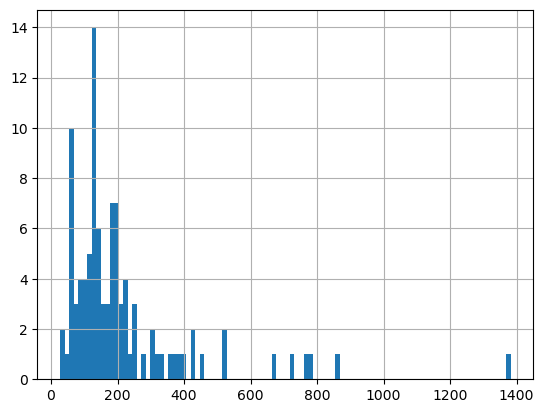

In [295]:
pd.Series( length).hist( bins = 100)